In [16]:

from egnn_pytorch import EGNN_Network
import torch
import torch.nn as nn
import numpy as np
import glob
import time
import gzip
import math
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, dropout=0.1, max_len=500):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2, dtype=torch.float) *
                             (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        if embed_dim % 2 == 1:
            # Handle odd dimensions by filling the remaining column with cos()
            pe[:, 1::2] = torch.cos(position * div_term)[:, :pe[:, 1::2].shape[1]]
        else:
            pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # (max_len, 1, embed_dim)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        x: Tensor with shape (seq_length, batch_size, embed_dim)
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)
    
class SimpleMultiheadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(SimpleMultiheadAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
    
    def forward(self, x):
        """
        x: Tensor of shape (seq_length, batch_size, embed_dim)
        """
        attn_outputs, attn_weights = self.multihead_attn(x, x, x)
        return attn_outputs
    
import torch
import torch.nn as nn
import torch.nn.functional as F

class TinyRegressor(nn.Module):
    def __init__(self, in_channels=2):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, 1, 1, padding=1)
            #nn.ReLU(),
            #nn.Conv2d(16, 32, 3, padding=1),
            #nn.ReLU()
        #)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.out  = nn.Linear(1, 1)

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x).flatten(1)   # (B, 32)
        return self.out(x)

       # (B, 1)
    
model = TinyRegressor()
#lin=nn.Linear(6,1)
A = PositionalEncoding(1)
mha = SimpleMultiheadAttention(2,1)

In [5]:

from egnn_pytorch import EGNN_Network
import torch
import torch.nn as nn
import numpy as np
import glob
import time
import gzip
import math
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, dropout=0.1, max_len=500):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2, dtype=torch.float) *
                             (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        if embed_dim % 2 == 1:
            # Handle odd dimensions by filling the remaining column with cos()
            pe[:, 1::2] = torch.cos(position * div_term)[:, :pe[:, 1::2].shape[1]]
        else:
            pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # (max_len, 1, embed_dim)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        x: Tensor with shape (seq_length, batch_size, embed_dim)
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)
    
class SimpleMultiheadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(SimpleMultiheadAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
    
    def forward(self, x):
        """
        x: Tensor of shape (seq_length, batch_size, embed_dim)
        """
        attn_outputs, attn_weights = self.multihead_attn(x, x, x)
        return attn_outputs
    
import torch
import torch.nn as nn
import torch.nn.functional as F

class TinyRegressor(nn.Module):
    def __init__(self, in_channels=2):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, 1, 1, padding=1)
            #nn.ReLU(),
            #nn.Conv2d(16, 32, 3, padding=1),
            #nn.ReLU()
        #)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.out  = nn.Linear(1, 1)

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x).flatten(1)   # (B, 32)
        return self.out(x)

       # (B, 1)
    
model = TinyRegressor()
#lin=nn.Linear(6,1)
A = PositionalEncoding(1)
mha = SimpleMultiheadAttention(2,1)

net=EGNN_Network(dim=2,
    depth=1,
    num_positions=100, #no
    num_tokens=78,
    #num_edge_tokens=3,
    #global_linear_attn_every=1,
    #global_linear_attn_dim_head=8,
    #num_global_tokens=2,
    #adj_dim=3,
    #fourier_features=2,
    m_dim=2,
    dropout=0.05)
    #norm_coors=True)

#lin=nn.Linear(6,1)
A = PositionalEncoding(1)
mha = SimpleMultiheadAttention(2,1) #6 is the dim
tlosses, losses=[],[]
pks=[]
outs=[]
paths=np.char.array(glob.glob("/home/jrhoernschemeyer/Desktop/data_prep/inputs/*.npz"))
val=paths[np.random.random_integers(low=0,high=len(paths)-2,size=np.int(0.4*len(paths)))]
train=np.char.array(list(set(paths).difference(set(val))))
#np.savez_compressed("/home/jrhoernschemeyer/Desktop/data_prep/split.npz",val=val, train=train)

optimizer= torch.optim.Adam(list(net.parameters()) + list(mha.parameters()) + list(model.parameters()), lr=.01, weight_decay=0.01)
criterion = nn.HuberLoss()
to=time.time()
for i in range(1):
    #try:
    
    train = list(np.array(train)[np.random.permutation(len(train))])
    print("epoch",i)
    for path in train:
        losses=[]
        pdb=np.char.encode(path[-8:-4])
        mha.train()
        net.train()
        model.train()
        optimizer.zero_grad()
        a=np.load(path,allow_pickle=True)
        zs,xs,targets=a["z"],a["pos"],a["pks"]
        ids=a["ids"]
        n = zs.shape[0]
        #shuffle
        idx = np.random.permutation(n)
        zs,xs,targets=zs[idx],xs[idx],targets[idx]
        ids=ids[idx]
        
        for z,x,y,id in zip(zs,xs,targets,ids):

            x=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)

            #x=torch.tensor(list(x)).unsqueeze(0)
            #z=torch.tensor(list(z),dtype=torch.int32)
            #remove H
            #mask = (z != 1)
            #z = z[mask]
            #x = x[mask]

            out=net(z,x)

            #print(out)
            #x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)
            #print(x)
            #x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            #pk = model(x)    
            #print(pk)    
            #out=mha(A(out[0][0]))
            #out.permute(2, 0, 1).unsqueeze(0) 
            #pk=model(out)
            pk=torch.sum(out[0])
            pks.append(pk)
            outs.append(out)
            ts.append(y)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            batch_loss += loss 
            tlosses.append(np.round(loss.item(),3))
            loss.backward(retain_graph=True)
            #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=.1)
            optimizer.step()
            #print(pk)

            #pk=torch.sum(out[0],dim=1)/(torch.max(out[0]))
            #out=lin(pk)
        batch_loss.backward()
        optimizer.step()
        batch_loss = 0

    print(("validating. last loss", loss, time.time()-to)/60,"minutes")
    for path in val:
        mha.eval()
        net.eval()
        model.eval()

        a=np.load(path,allow_pickle=True)
        zs,xs,targets=a["z"],a["pos"],a["pks"]
        #n = zs.shape[0]
        #shuffle
        #idx = np.random.permutation(n)
        #zs,xs,targets=zs[idx],xs[idx],targets[idx]
        
        for z,x,y in zip(zs,xs,targets):
            
            xx=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)
            
            #mask= z != 1
            #z = z[mask]
            #x = x[mask]
            out=net(z,xx)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)

            #x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)
            loss = criterion(out,torch.tensor(y))
            losses.append(np.round(loss.item(),3))
            out=net(z,x)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)

            x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)        
            #out=mha(A(out[0][0]))
            #out.permute(2, 0, 1).unsqueeze(0) 
            #pk=model(out)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            losses.append(np.round(loss.item(),3))
            loss.backward()
            optimizer.step()
            print(pk,loss)

    #
                    
    #except Exception as e:
        #print("exception",e,pdb,z)
        #continue    
        #with gzip.open("/home/jrhoernschemeyer/Desktop/data_prep/valresultsfinal.gz","a") as f:
            #f.write(np.char.encode(str(np.round(np.mean(losses).item(),3))))
            #f.write(b" ")
            #f.close()
            

/home/jrhoernschemeyer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:92: DeprecationWarning: This function is deprecated. Please call randint(0, 20993 + 1) instead


epoch 0
tensor(15.4806, grad_fn=<SumBackward0>)
tensor(14.8293, grad_fn=<SumBackward0>)
tensor(16.7259, grad_fn=<SumBackward0>)
tensor(11.9701, grad_fn=<SumBackward0>)
tensor(11.3714, grad_fn=<SumBackward0>)
tensor(12.0751, grad_fn=<SumBackward0>)
tensor(11.3498, grad_fn=<SumBackward0>)
tensor(11.4964, grad_fn=<SumBackward0>)
tensor(8.5461, grad_fn=<SumBackward0>)
tensor(4.3316, grad_fn=<SumBackward0>)
tensor(6.6953, grad_fn=<SumBackward0>)
tensor(5.4964, grad_fn=<SumBackward0>)
tensor(-0.6347, grad_fn=<SumBackward0>)
tensor(-2.7419, grad_fn=<SumBackward0>)
tensor(-5.8542, grad_fn=<SumBackward0>)
tensor(-8.3197, grad_fn=<SumBackward0>)
tensor(-6.0672, grad_fn=<SumBackward0>)
tensor(-10.2231, grad_fn=<SumBackward0>)
tensor(-4.2165, grad_fn=<SumBackward0>)
tensor(-6.5836, grad_fn=<SumBackward0>)
tensor(-2.5912, grad_fn=<SumBackward0>)
tensor(-5.2411, grad_fn=<SumBackward0>)
tensor(-6.3934, grad_fn=<SumBackward0>)
tensor(-1.5306, grad_fn=<SumBackward0>)
tensor(-4.5634, grad_fn=<SumBackwar

KeyboardInterrupt: 

In [34]:
pk

tensor(1106.9790)

global linear attention csausing it to explode 

In [363]:

from egnn_pytorch import EGNN_Network
import torch
import torch.nn as nn
import numpy as np
import glob
import time
import gzip
import math
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, dropout=0.1, max_len=500):
        super().__init__()
        #self.dropout = nn.Dropout(p=dropout)
        
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2, dtype=torch.float) *
                             (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        if embed_dim % 2 == 1:
            # Handle odd dimensions by filling the remaining column with cos()
            pe[:, 1::2] = torch.cos(position * div_term)[:, :pe[:, 1::2].shape[1]]
        else:
            pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # (max_len, 1, embed_dim)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        x: Tensor with shape (seq_length, batch_size, embed_dim)
        """
        x = x + self.pe[:x.size(0)]
        return x#self.dropout(x)
    
class SimpleMultiheadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(SimpleMultiheadAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim, num_heads)
    
    def forward(self, x):
        """
        x: Tensor of shape (seq_length, batch_size, embed_dim)
        """
        attn_outputs, attn_weights = self.multihead_attn(x, x, x)
        return attn_outputs
    
import torch
import torch.nn as nn
import torch.nn.functional as F

class TinyRegressor(nn.Module):
    def __init__(self, in_channels=2):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, 1, 1, padding=1)
            #nn.ReLU(),
            #nn.Conv2d(16, 32, 3, padding=1),
            #nn.ReLU()
        #)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.out  = nn.Linear(1, 1)

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x).flatten(1)   # (B, 32)
        return self.out(x)

       # (B, 1)
    
model = TinyRegressor()
#lin=nn.Linear(6,1)
A = PositionalEncoding(1)
mha = SimpleMultiheadAttention(2,1)

net=EGNN_Network(dim=2,
    depth=4,
    num_positions=500, #no
    num_tokens=78,
    #num_edge_tokens=1,
    #global_linear_attn_every=1,
    #global_linear_attn_dim_head=8,
    #num_global_tokens=2,
    #adj_dim=3,
    fourier_features=2,
    dropout=0.15,
    coor_weights_clamp_value = 2)
    #norm_coors=True)

#lin=nn.Linear(6,1)
A = PositionalEncoding(1)
mha = SimpleMultiheadAttention(2,1) #6 is the dim
tlosses, losses=[],[]
pks=[]
outs=[]
ts=[]
paths=np.char.array(glob.glob("/home/jrhoernschemeyer/Desktop/data_prep/inputs/*.npz"))
val=paths[np.random.random_integers(low=0,high=len(paths)-2,size=np.int(0.4*len(paths)))]
train=np.char.array(list(set(paths).difference(set(val))))
#np.savez_compressed("/home/jrhoernschemeyer/Desktop/data_prep/split.npz",val=val, train=train)

optimizer= torch.optim.Adam(list(net.parameters()) + list(mha.parameters()) + list(model.parameters()), lr=.01, weight_decay=0.01)
criterion = nn.HuberLoss()
to=time.time()
for i in range(1):
    #try:
    
    train = list(np.array(train)[np.random.permutation(len(train))])
    print("epoch",i)
    for path in train:
        batch_loss=0
        losses=[]
        pdb=np.char.encode(path[-8:-4])
        mha.train()
        net.train()
        model.train()
        optimizer.zero_grad()
        a=np.load(path,allow_pickle=True)
        zs,xs,targets=a["z"],a["pos"],a["pks"]
        ids=a["ids"]
        n = zs.shape[0]
        #shuffle
        idx = np.random.permutation(n)
        zs,xs,targets=zs[idx],xs[idx],targets[idx]
        ids=ids[idx]
        
        for z,x,y,id in zip(zs,xs,targets,ids):

            x=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)

            #x=torch.tensor(list(x)).unsqueeze(0)
            #z=torch.tensor(list(z),dtype=torch.int32)
            #remove H
            #mask = (z != 1)
            #z = z[mask]
            #x = x[mask]

            out=net(z,x)

            #print(out)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)
            #print(x)
            #x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            #pk = model(x)    
            #print(pk)    
            #out=mha(A(out[0][0]))
            #out.permute(2, 0, 1).unsqueeze(0) 
            out=nn.LeakyReLU(negative_slope=.1)(x)
            #pk=model(out)
            pk=torch.sum(out)
            pks.append(pk)
            outs.append(out)
            ts.append(y)
            print(id, pk, y)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            
            tlosses.append(np.round(loss.item(),3))
            loss.backward()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=.1)
            optimizer.step()
            #print(pk)

            #pk=torch.sum(out[0],dim=1)/(torch.max(out[0]))
            #out=lin(pk)
        #batch_loss.backward()
        #optimizer.step()
        #batch_loss = 0
    
    

/home/jrhoernschemeyer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: DeprecationWarning: This function is deprecated. Please call randint(0, 20993 + 1) instead


epoch 0
b'132A3' tensor(11.4502, grad_fn=<SumBackward0>) 3.5115
b'80A2' tensor(4.5553, grad_fn=<SumBackward0>) 1.3208
b'38A4' tensor(3.9845, grad_fn=<SumBackward0>) -0.96421
b'380A1' tensor(0.9150, grad_fn=<SumBackward0>) -0.10861
b'537A1' tensor(-0.3787, grad_fn=<SumBackward0>) -0.79939
b'135A4' tensor(-1.6515, grad_fn=<SumBackward0>) -0.76345
b'522A1' tensor(-1.3258, grad_fn=<SumBackward0>) -0.69925
b'477A0' tensor(-2.2829, grad_fn=<SumBackward0>) -1.12954
b'192A4' tensor(-1.9643, grad_fn=<SumBackward0>) 0.14611
b'158A4' tensor(-1.8929, grad_fn=<SumBackward0>) -0.04191
b'100A2' tensor(-1.1788, grad_fn=<SumBackward0>) 0.4436
b'308A5' tensor(0.4186, grad_fn=<SumBackward0>) 1.4863
b'509A4' tensor(3.4565, grad_fn=<SumBackward0>) -1.11654
b'364A3' tensor(25.5014, grad_fn=<SumBackward0>) 0.52
b'228A5' tensor(2.1353, grad_fn=<SumBackward0>) 3.8373
b'462A4' tensor(-171.6145, grad_fn=<SumBackward0>) -0.10604
b'31A1' tensor(-2.9853, grad_fn=<SumBackward0>) -0.22485
b'226A2' tensor(0.5537, grad

KeyboardInterrupt: 

plt.plot(tloss)

(0.0, 4000.0)

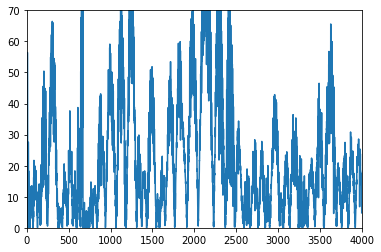

In [321]:
#nomha
plt.plot(tlosses)
plt.ylim(0,70)
plt.xlim(0,4000)

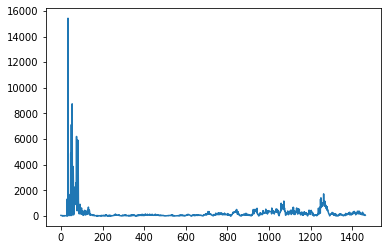

In [348]:
#all lol
plt.plot(tlosses)
#plt.ylim(0,70)
#plt.xlim(0,4000)

(0.0, 200.0)

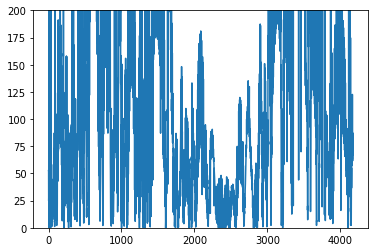

In [351]:

plt.plot(tlosses)
plt.ylim(0,200)
#plt.xlim(0,4000)

nomha

(0.0, 200.0)

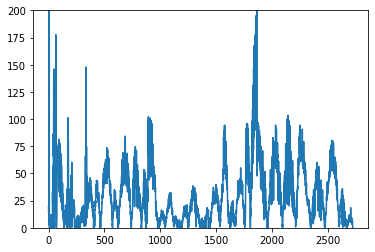

In [327]:

plt.plot(tlosses)
plt.ylim(0,200)
#plt.xlim(0,4000)

(0.0, 400.0)

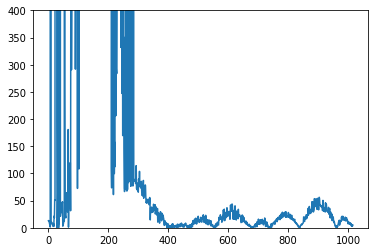

In [331]:

plt.plot(tlosses)
plt.ylim(0,400)
#plt.xlim(0,4000)

mha

with just the egnn it was so reliant on the last sample. mha and reduce dim fix that

(0.0, 800.0)

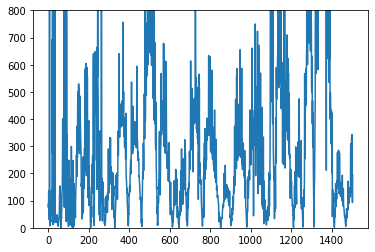

In [338]:
#nomha
plt.plot(tlosses)
plt.ylim(0,800)
#plt.xlim(0,4000)

In [ ]:
net=EGNN_Network(dim=2,
    depth=4,
    num_positions=500, #no
    num_tokens=78,
    #num_edge_tokens=1,
    #global_linear_attn_every=1,
    #global_linear_attn_dim_head=8,
    #num_global_tokens=2,
    #adj_dim=3,
    fourier_features=1,
    dropout=0.15,
    )
    #norm_coors=True)
for i in range(1):
    #try:
    
    train = list(np.array(train)[np.random.permutation(len(train))])
    print("epoch",i)
    for path in train:
        losses=[]
        pdb=np.char.encode(path[-8:-4])
        mha.train()
        net.train()
        model.train()
        optimizer.zero_grad()
        a=np.load(path,allow_pickle=True)
        zs,xs,targets,ids=a["z"],a["pos"],a["pks"],a["ids"]
        n = zs.shape[0]
        #shuffle
        idx = np.random.permutation(n)
        zs,xs,targets=zs[idx],xs[idx],targets[idx]
        
        for z,x,y in zip(zs,xs,targets):

            x=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)

            #x=torch.tensor(list(x)).unsqueeze(0)
            #z=torch.tensor(list(z),dtype=torch.int32)
            #remove H
            #mask = (z != 1)
            #z = z[mask]
            #x = x[mask]

            out=net(z,x)
            #print(out[0])
            #print(out)
            #x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)
            #print(x)
            #x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            #pk = model(x)    
            #print(pk)    
            out=mha(A(out[0][0]))
            #print(out)
            ##for o in out:
                #plt.plot(o.detach().numpy())
            #out.permute(2, 0, 1).unsqueeze(0) 
            #pk=model(out)
            out=nn.LeakyReLU(negative_slope=.1)(out)
            pk=torch.sum(out)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            tlosses.append(np.round(loss.item(),3))
            loss.backward(retain_graph=True)
            #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=.1)
            optimizer.step()
            #print(pk,loss)
            #print("")

            #pk=torch.sum(out[0],dim=1)/(torch.max(out[0]))
            #out=lin(pk)
        optimizer.step()
        #print(loss,ids[-1])

    print(("validating. last loss", loss, time.time()-to)/60,"minutes")
    for path in val:
        mha.eval()
        net.eval()
        model.eval()

        a=np.load(path,allow_pickle=True)
        zs,xs,targets=a["z"],a["pos"],a["pks"]
        #n = zs.shape[0]
        #shuffle
        #idx = np.random.permutation(n)
        #zs,xs,targets=zs[idx],xs[idx],targets[idx]
        
        for z,x,y in zip(zs,xs,targets):
            
            xx=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)
            
            #mask= z != 1
            #z = z[mask]
            #x = x[mask]
            out=net(z,xx)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)
            x = mha(A(x)) 

            #x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)
            loss = criterion(out,torch.tensor(y))
            losses.append(np.round(loss.item(),3))
            out=net(z,x)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)

            x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)        
            #out=mha(A(out[0][0]))
            #out.permute(2, 0, 1).unsqueeze(0) 
            #pk=model(out)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            losses.append(np.round(loss.item(),3))
            loss.backward()
            optimizer.step()
            print(pk,loss)

    #

epoch 0


KeyboardInterrupt: 

(0.0, 70.0)

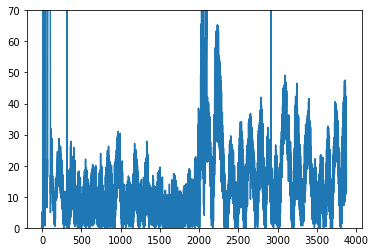

In [315]:
#no mha
plt.plot(tlosses)
plt.ylim(0,70)

In [312]:
outs

[(tensor([[[-0.7582, -1.5962],
           [ 0.7871, -0.0967],
           [ 1.4937,  0.2175],
           [-1.1874,  0.5641],
           [ 1.2711,  0.0073],
           [ 0.7071,  0.0143],
           [ 1.4300,  1.5294],
           [ 0.2932, -0.3573],
           [ 0.5233, -1.3099]]], grad_fn=<AddBackward0>),
  tensor([[[20.6227, -4.0933,  4.7648],
           [20.6222, -4.0874,  4.7516],
           [20.6100, -4.0903,  4.7443],
           [20.6013, -4.0995,  4.7481],
           [20.6337, -4.0920,  4.7436],
           [20.6472, -4.0874,  4.7493],
           [20.6589, -4.0891,  4.7397],
           [20.6710, -4.0832,  4.7456],
           [20.6746, -4.0886,  4.7589]]], grad_fn=<AddBackward0>)),
 (tensor([[[-0.8304, -1.6687],
           [ 0.7126, -0.1714],
           [ 1.4210,  0.1448],
           [-1.2617,  0.4898],
           [ 1.2007, -0.0631],
           [ 0.6307, -0.0625],
           [ 1.3543,  1.4537],
           [ 0.2176, -0.4326],
           [ 0.4490, -1.3839]]], grad_fn=<AddBackward0>),


In [310]:

plt.plot(torch.sum(out,dim=0).detach().numpy(),"o")

TypeError: sum() received an invalid combination of arguments - got (tuple, dim=int), but expected one of:
 * (Tensor input, *, torch.dtype dtype)
 * (Tensor input, tuple of ints dim, bool keepdim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of names dim, bool keepdim, *, torch.dtype dtype, Tensor out)


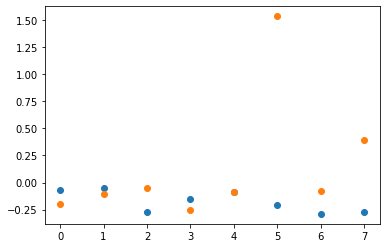

In [292]:
out.shape
plt.plot(torch.sum(out,dim=0).detach().numpy(),"o")

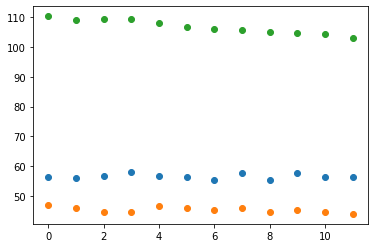

In [345]:

plt.plot(torch.sum(x,dim=0).detach().numpy(),"o")

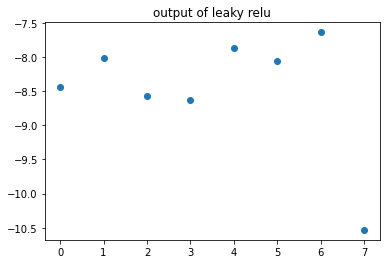

Text(0.5, 1.0, 'output of mha')

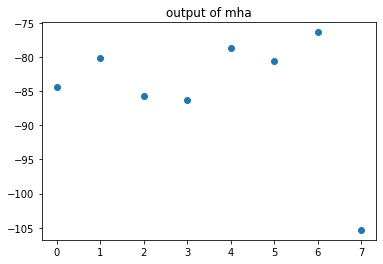

In [360]:
plt.plot(torch.sum(torch.sum(out,dim=0),dim=-1).detach().numpy(),"o")
plt.title("output of leaky relu")
plt.show()
plt.plot(torch.sum(torch.sum(x,dim=0),dim=-1).detach().numpy(),"o")
plt.title("output of mha")

(0.0, 200.0)

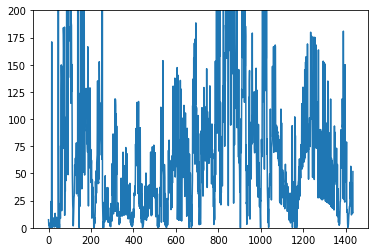

In [382]:
plt.plot(tlosses)
plt.ylim(0,200)

In [386]:
import torch
import torch.nn as nn

class SimpleSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(SimpleSelfAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads)

    def forward(self, x):
        # x shape: (sequence_length, batch_size, embed_dim)
        attn_output, attn_weights = self.attention(x, x, x)
        return attn_output, attn_weights

# Example usage:
#seq_length, batch_size, embed_dim = 10, 32, 64
#dummy_input = torch.randn(seq_length, batch_size, embed_dim)
model = SimpleSelfAttention(1, num_heads=1)
output, weights = model(out1[0])

print("Output shape:", output.shape)
print("Attention weights shape:", weights.shape)


NameError: name 'out1' is not defined

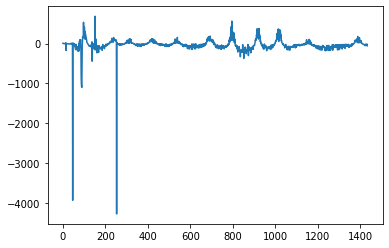

In [384]:
plt.plot(pks)

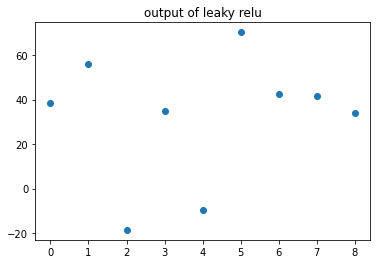

Text(0.5, 1.0, 'output of mha')

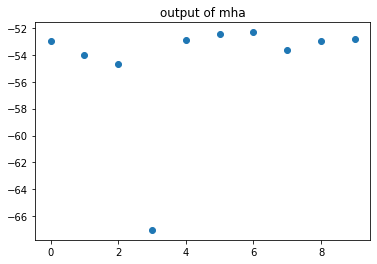

In [380]:
plt.plot(torch.sum(torch.sum(out,dim=0),dim=-1).detach().numpy(),"o")
plt.title("output of leaky relu")
plt.show()
plt.plot(torch.sum(torch.sum(x,dim=0),dim=-1).detach().numpy(),"o")
plt.title("output of mha")

(-80.0, 80.0)

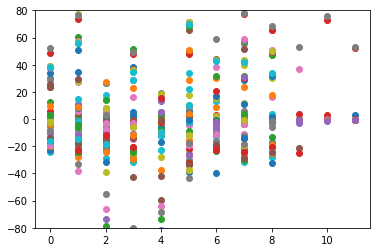

In [378]:
for out in outs[:1]:
    plt.plot(torch.sum(torch.sum(out,dim=0),dim=-1).detach().numpy(),"o")
    #plt.title("output of leaky relu")
plt.ylim(-80,80)
#plt.legend()

In [372]:
len(outs)

1435

In [368]:
z

tensor([[7, 6, 6, 8, 6, 6, 7, 6, 6, 7]], dtype=torch.int32)

In [367]:
y

-2.39222

In [ ]:
code = {b"H":b"0",
    b"A":b"1",
    b"L":b"2",
    b"T":b"3",
    b"G":b"4",
    b"C":b"5"}

epoch 0
tensor(42.9830, grad_fn=<HuberLossBackward0>)
tensor(35.5090, grad_fn=<HuberLossBackward0>)
tensor(38.3906, grad_fn=<HuberLossBackward0>)
tensor(38.7391, grad_fn=<HuberLossBackward0>)
tensor(37.1533, grad_fn=<HuberLossBackward0>)
tensor(28.6493, grad_fn=<HuberLossBackward0>)
tensor(68.9228, grad_fn=<HuberLossBackward0>)
tensor(42.6243, grad_fn=<HuberLossBackward0>)
tensor(57.6550, grad_fn=<HuberLossBackward0>)
tensor(5.4262, grad_fn=<HuberLossBackward0>)
tensor(35.6776, grad_fn=<HuberLossBackward0>)
tensor(24.8570, grad_fn=<HuberLossBackward0>)
tensor(45.7452, grad_fn=<HuberLossBackward0>)
tensor(32.2188, grad_fn=<HuberLossBackward0>)
tensor(26.2340, grad_fn=<HuberLossBackward0>)
tensor(36.0873, grad_fn=<HuberLossBackward0>)
tensor(30.1477, grad_fn=<HuberLossBackward0>)
tensor(23.9975, grad_fn=<HuberLossBackward0>)
tensor(16.6704, grad_fn=<HuberLossBackward0>)
tensor(6.9508, grad_fn=<HuberLossBackward0>)
tensor(11.2641, grad_fn=<HuberLossBackward0>)
tensor(21.5662, grad_fn=<Hub

KeyboardInterrupt: 

0.8033499999999999

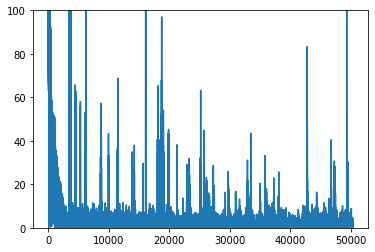

In [279]:
plt.plot(tlosses)
plt.ylim(0,100)
np.mean(tlosses[-100:])
#more f feats

0.2873

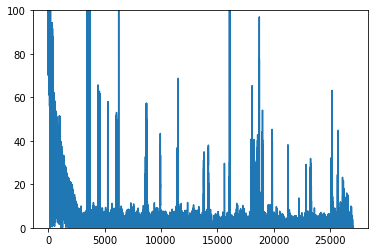

In [276]:
plt.plot(tlosses)
plt.ylim(0,100)
np.mean(tlosses[-10:])
#more f feats

In [ ]:
plt.plot(tlosses)
plt.ylim(0,100)
np.mean(tlosses[-10:])

36.027

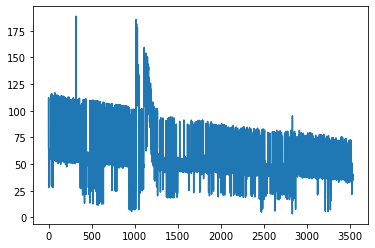

In [237]:
plt.plot(tlosses)
#plt.ylim(0,100)
np.mean(tlosses[-2:])
#more f feats

1.2475

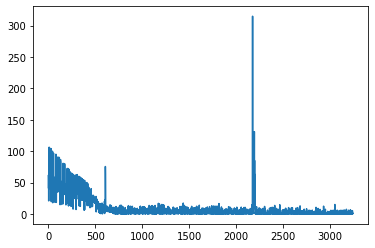

In [235]:
plt.plot(tlosses)
#plt.ylim(0,100)
np.mean(tlosses[-2:])
#more f feats

1.06399

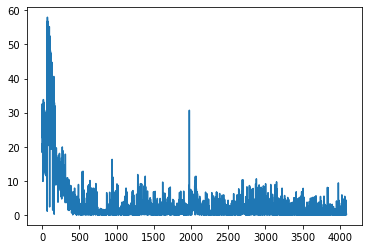

In [228]:
plt.plot(tlosses)
#plt.ylim(0,100)
np.mean(tlosses[-1000:])
#more f feats

4.001625828970331

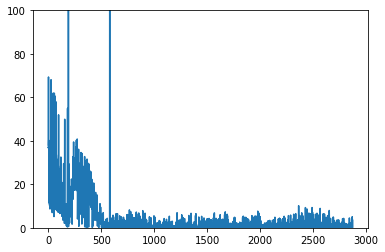

In [216]:
plt.plot(tlosses)
plt.ylim(0,100)
np.mean(tlosses[:-10])

4.824081364244316

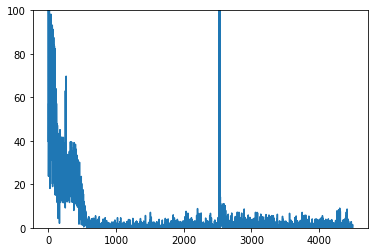

In [214]:
plt.plot(tlosses)
plt.ylim(0,100)
np.mean(tlosses[:-10])

In [ ]:
plt.plot(tlosses)
plt.ylim(0,100)
np.mean(tlosses[:-10])

7.0337

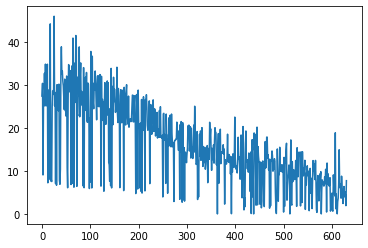

In [206]:
plt.plot(tlosses)
#plt.ylim(0,20)
np.mean(tlosses[-100:])

1.20345

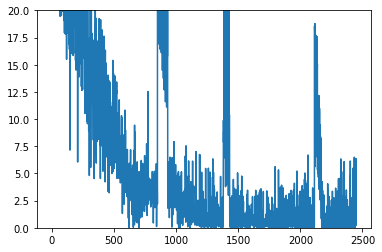

In [203]:
plt.plot(tlosses)
plt.ylim(0,20)
np.mean(tlosses[-100:])

In [201]:
losses

[]

evidence

In [126]:
z

tensor([[ 7,  6,  6,  8,  6,  6,  6,  8,  8,  1,  1,  1,  1,  1,  1,  7,  6,  6,
          8,  6, 16,  1,  1,  1,  1,  7,  6,  6,  8,  6,  6,  6,  8,  8,  1,  1,
          1,  1,  1,  1,  7,  6,  6,  8,  6,  6,  6,  8,  8,  1,  1,  1,  1,  1,
          1,  7,  6,  6,  8,  6,  6,  8,  8,  1,  1,  1,  1,  7,  6,  6,  8,  6,
          6,  8,  8,  1,  1,  1,  1,  7,  6,  6,  8,  6,  6,  6,  6,  7,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  6,  6,  8,  6, 16,  1,
          1,  1,  1,  7,  6,  6,  8,  6,  6,  6,  6,  7,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1]], dtype=torch.int32)

(0.0, 20.0)

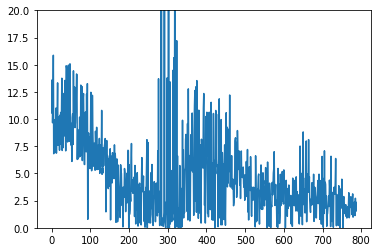

In [189]:
plt.plot(tlosses)
plt.ylim(0,20)


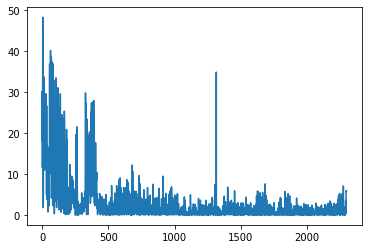

In [196]:
plt.plot(tlosses)
#plt.ylim(0,20)

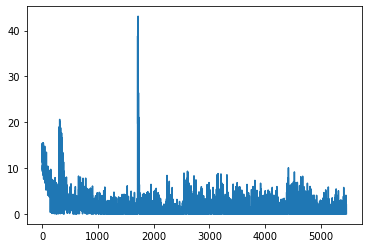

In [142]:
plt.plot(tlosses)
#plt.ylim(0,10)

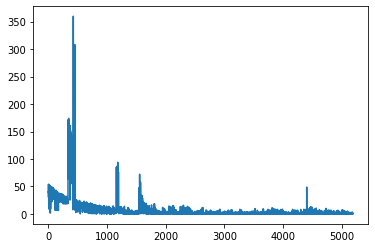

In [144]:
plt.plot(tlosses)
#from neg slope .02 b4 changing other things


In [147]:
np.mean(tlosses[-10])

0.426

0.6

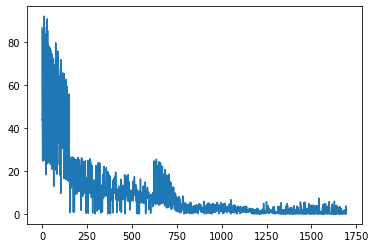

In [152]:
plt.plot(tlosses)
np.mean(tlosses[-10])

0.194

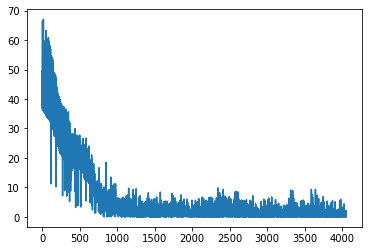

In [154]:
#now with bit of weight decay
plt.plot(tlosses)
np.mean(tlosses[-10])

0.028

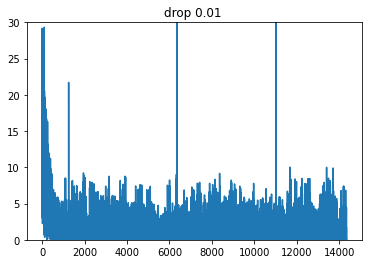

In [163]:
#now with bit of weight decay
plt.plot(tlosses)
plt.title("drop 0.01 ")
plt.ylim(0,30)
np.mean(tlosses[-10])

0.8266000000000002

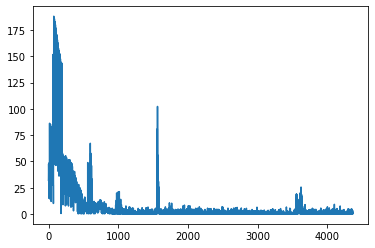

In [169]:
plt.plot(tlosses)
np.mean(tlosses[-10:])

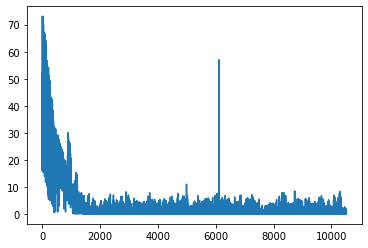

In [118]:
plt.plot(tlosses)

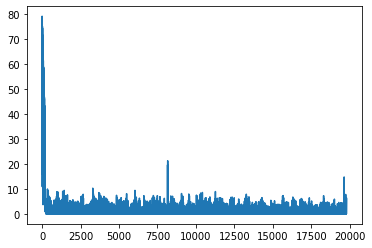

In [130]:
plt.plot(tlosses)
#plt.ylim(0,10)

0.752922

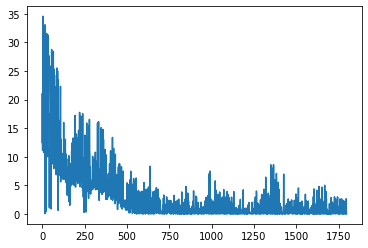

In [173]:
plt.plot(tlosses)
np.mean(tlosses[-1000:])

1.7414999999999998

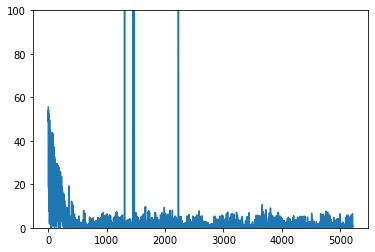

In [180]:
plt.plot(tlosses)
np.mean(tlosses[-1000:])
plt.ylim(0,100)
#dim10
np.mean(tlosses[-10:])

0.8286

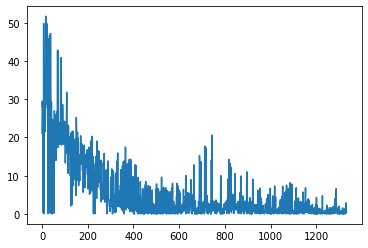

In [183]:
plt.plot(tlosses)
np.mean(tlosses[-1000:])
#plt.ylim(0,100)
#dim10
np.mean(tlosses[-10:])

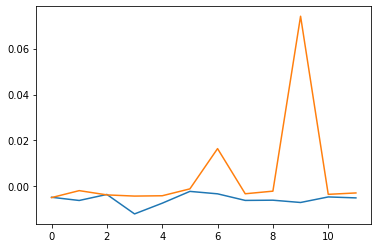

In [128]:
plt.plot((out[3].detach().numpy()))

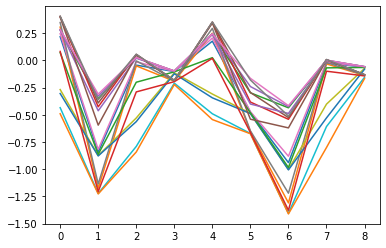

In [32]:
from matplotlib import pyplot as plt
for o in out:
    plt.plot((o.detach().numpy()))

In [35]:
o.detach().numpy()

array([[ 0.28397095,  0.40649927],
       [-0.30956325, -0.36126226],
       [ 0.02720504,  0.05735054],
       [-0.09690376, -0.18320733],
       [ 0.24528767,  0.3542192 ],
       [-0.16431847, -0.179691  ],
       [-0.41593707, -0.5117229 ],
       [ 0.00272159,  0.00898519],
       [-0.05700482, -0.13069686]], dtype=float32)

In [54]:
o

tensor([[ 0.2840,  0.4065],
        [-0.3096, -0.3613],
        [ 0.0272,  0.0574],
        [-0.0969, -0.1832],
        [ 0.2453,  0.3542],
        [-0.1643, -0.1797],
        [-0.4159, -0.5117],
        [ 0.0027,  0.0090],
        [-0.0570, -0.1307]], grad_fn=<UnbindBackward0>)

In [62]:
torch.sum((torch.sinh(o)))

tensor(-1.0499, grad_fn=<SumBackward0>)

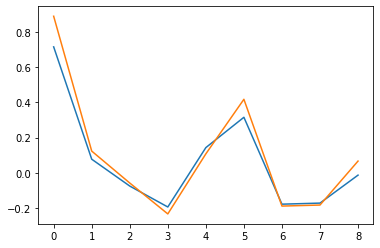

In [48]:
plt.plot(np.gradient(np.gradient(o.detach().numpy()))[0][0])

x

In [31]:
mask = (z != 1)
torch.from_numpy(z[mask]).unsqueeze(0)
x[mask]

/home/jrhoernschemeyer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [28]:
x

tensor([[[ 0.0173, -0.0489],
         [ 2.6535, -1.1719],
         [ 0.0400, -0.0226],
         [-0.0043, -0.0739],
         [ 0.0947,  0.0406],
         [ 0.0231, -0.0422],
         [ 0.0363, -0.0270],
         [ 0.0929,  0.0385],
         [ 2.5898, -1.2169],
         [-0.0036, -0.0731],
         [ 0.0227, -0.0426],
         [ 0.0217, -0.0438]],

        [[ 0.0173, -0.0489],
         [ 2.6513, -1.1709],
         [ 0.0401, -0.0225],
         [-0.0043, -0.0739],
         [ 1.7879, -0.8732],
         [ 0.0232, -0.0420],
         [ 0.0363, -0.0270],
         [ 0.0930,  0.0386],
         [ 2.5634, -1.2090],
         [-0.0034, -0.0728],
         [ 0.0684, -0.0639],
         [ 0.0217, -0.0438]],

        [[ 0.0173, -0.0489],
         [ 2.6512, -1.1708],
         [ 0.0408, -0.0217],
         [-0.0043, -0.0739],
         [ 0.0947,  0.0406],
         [ 0.0232, -0.0420],
         [ 0.0363, -0.0270],
         [ 0.0930,  0.0386],
         [ 2.5617, -1.2085],
         [-0.0034, -0.0728],
         [

out

In [10]:
out

(tensor([[[nan, nan],
          [nan, nan],
          [nan, nan],
          [nan, nan],
          [nan, nan],
          [nan, nan],
          [nan, nan],
          [nan, nan],
          [nan, nan]]], grad_fn=<AddBackward0>),
 tensor([[[nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan],
          [nan, nan, nan]]], grad_fn=<AddBackward0>))

In [ ]:
net=EGNN_Network(dim=2,
    depth=6,
    num_positions=500,
    num_tokens=78,
    num_edge_tokens=3,
    global_linear_attn_every=1,
    global_linear_attn_dim_head=8,
    num_global_tokens=2,
    adj_dim=3,
    fourier_features=2,
    m_dim=2,
    dropout=0.05)

#lin=nn.Linear(6,1)
A = PositionalEncoding(1)
mha = SimpleMultiheadAttention(2,1) #6 is the dim
tlosses, losses=[],[]
paths=np.char.array(glob.glob("/home/jrhoernschemeyer/Desktop/data_prep/inputs/*.npz"))
val=paths[np.random.random_integers(low=0,high=len(paths)-2,size=np.int(0.4*len(paths)))]
train=np.char.array(list(set(paths).difference(set(val))))
#np.savez_compressed("/home/jrhoernschemeyer/Desktop/data_prep/split.npz",val=val, train=train)

optimizer= torch.optim.Adam(list(net.parameters()) + list(mha.parameters()) + list(model.parameters()), lr=.01, weight_decay=0.01)
criterion = nn.HuberLoss()
to=time.time()
for i in range(1):
    #try:
    
    train = list(np.array(train)[np.random.permutation(len(train))])
    print("epoch",i)
    for path in train:
        losses=[]
        pdb=np.char.encode(path[-8:-4])
        mha.train()
        net.train()
        model.train()
        optimizer.zero_grad()
        a=np.load(path,allow_pickle=True)
        zs,xs,targets=a["z"],a["pos"],a["pks"]
        n = zs.shape[0]
        #shuffle
        idx = np.random.permutation(n)
        zs,xs,targets=zs[idx],xs[idx],targets[idx]
        
        for z,x,y in zip(zs,xs,targets):

            x=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)

            #x=torch.tensor(list(x)).unsqueeze(0)
            #z=torch.tensor(list(z),dtype=torch.int32)
            #remove H
            #mask = (z != 1)
            #z = z[mask]
            #x = x[mask]

            out=net(z,x)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)

            x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)        
            #out=mha(A(out[0][0]))
            #out.permute(2, 0, 1).unsqueeze(0) 
            #pk=model(out)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            tlosses.append(np.round(loss.item(),3))
            loss.backward()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            print(pk,loss)

            #pk=torch.sum(out[0],dim=1)/(torch.max(out[0]))
            #out=lin(pk)

    print(("validating. last loss", loss, time.time()-to)/60,"minutes")
    for path in val:
        mha.eval()
        net.eval()
        model.eval()

        a=np.load(path,allow_pickle=True)
        zs,xs,targets=a["z"],a["pos"],a["pks"]
        #n = zs.shape[0]
        #shuffle
        #idx = np.random.permutation(n)
        #zs,xs,targets=zs[idx],xs[idx],targets[idx]
        
        for z,x,y in zip(zs,xs,targets):
            
            x=torch.tensor(x).unsqueeze(0)
            z=torch.tensor(z[0].astype(np.int32)).unsqueeze(0)
            
            #mask= z != 1
            #z = z[mask]
            #x = x[mask]
            out=net(z,x)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)

            x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)
            loss = criterion(out,torch.tensor(y))
            losses.append(np.round(loss.item(),3))
            out=net(z,x)
            x = mha(A(out[0][0]))          #  shape: (H, W, C) = (9, 9, 6)

            x = x.permute(2, 0, 1).unsqueeze(0)   # → (B, C, H, W) = (1, 6, 9, 9)

            pk = model(x)        
            #out=mha(A(out[0][0]))
            #out.permute(2, 0, 1).unsqueeze(0) 
            #pk=model(out)
            #print("why")
            loss = criterion(pk,torch.tensor(y))
            losses.append(np.round(loss.item(),3))
            loss.backward()
            optimizer.step()
            print(pk,loss)

    #
                    
    #except Exception as e:
        #print("exception",e,pdb,z)
        #continue    
        #with gzip.open("/home/jrhoernschemeyer/Desktop/data_prep/valresultsfinal.gz","a") as f:
            #f.write(np.char.encode(str(np.round(np.mean(losses).item(),3))))
            #f.write(b" ")
            #f.close()
            

NameError: name 'EGNN_Network' is not defined

In [ ]:
from matplotlib import pyplot as plt
plt.plot()